In [1]:
import pandas as pd

In [2]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [4]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t', usecols=columns)
df.head(4)

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000


In [5]:
df.shape

(2930, 6)

In [6]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900
...,...,...,...,...,...,...
2925,6,6,1003.0,1,1003,142500
2926,5,5,864.0,1,902,131000
2927,5,5,912.0,1,970,132000
2928,5,5,1389.0,1,1389,170000


In [7]:
df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)] # Null including string 

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
1341,4,7,NaN,1,896,79000


In [11]:
df = df.drop(index=1341)

In [12]:
df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [14]:
from mlxtend.plotting import scatterplotmatrix 
import matplotlib.pyplot as plt

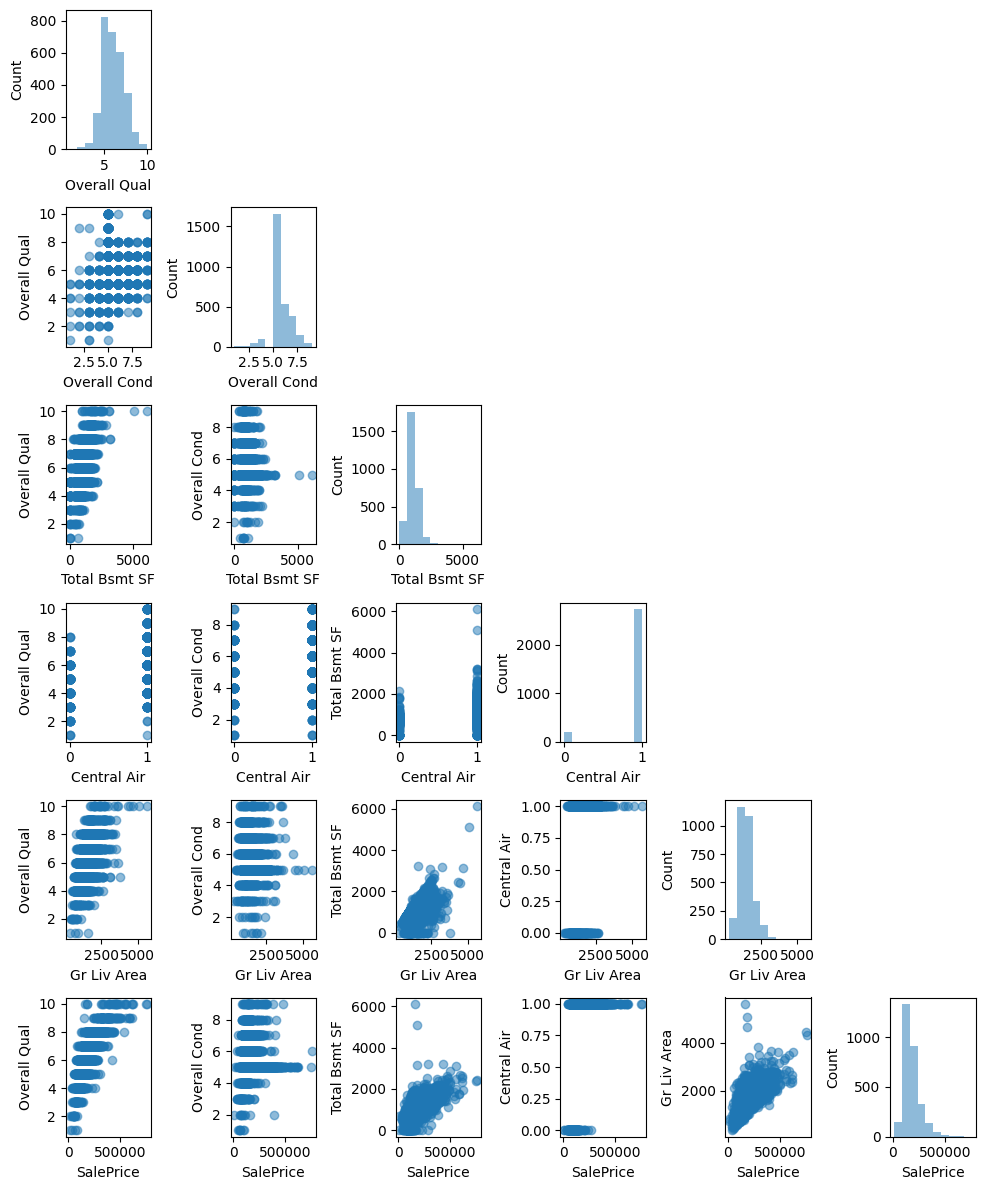

In [17]:
scatterplotmatrix(df.values, figsize=[10, 12], names=df.columns, alpha=.5);
plt.tight_layout()

In [18]:
import seaborn as sns

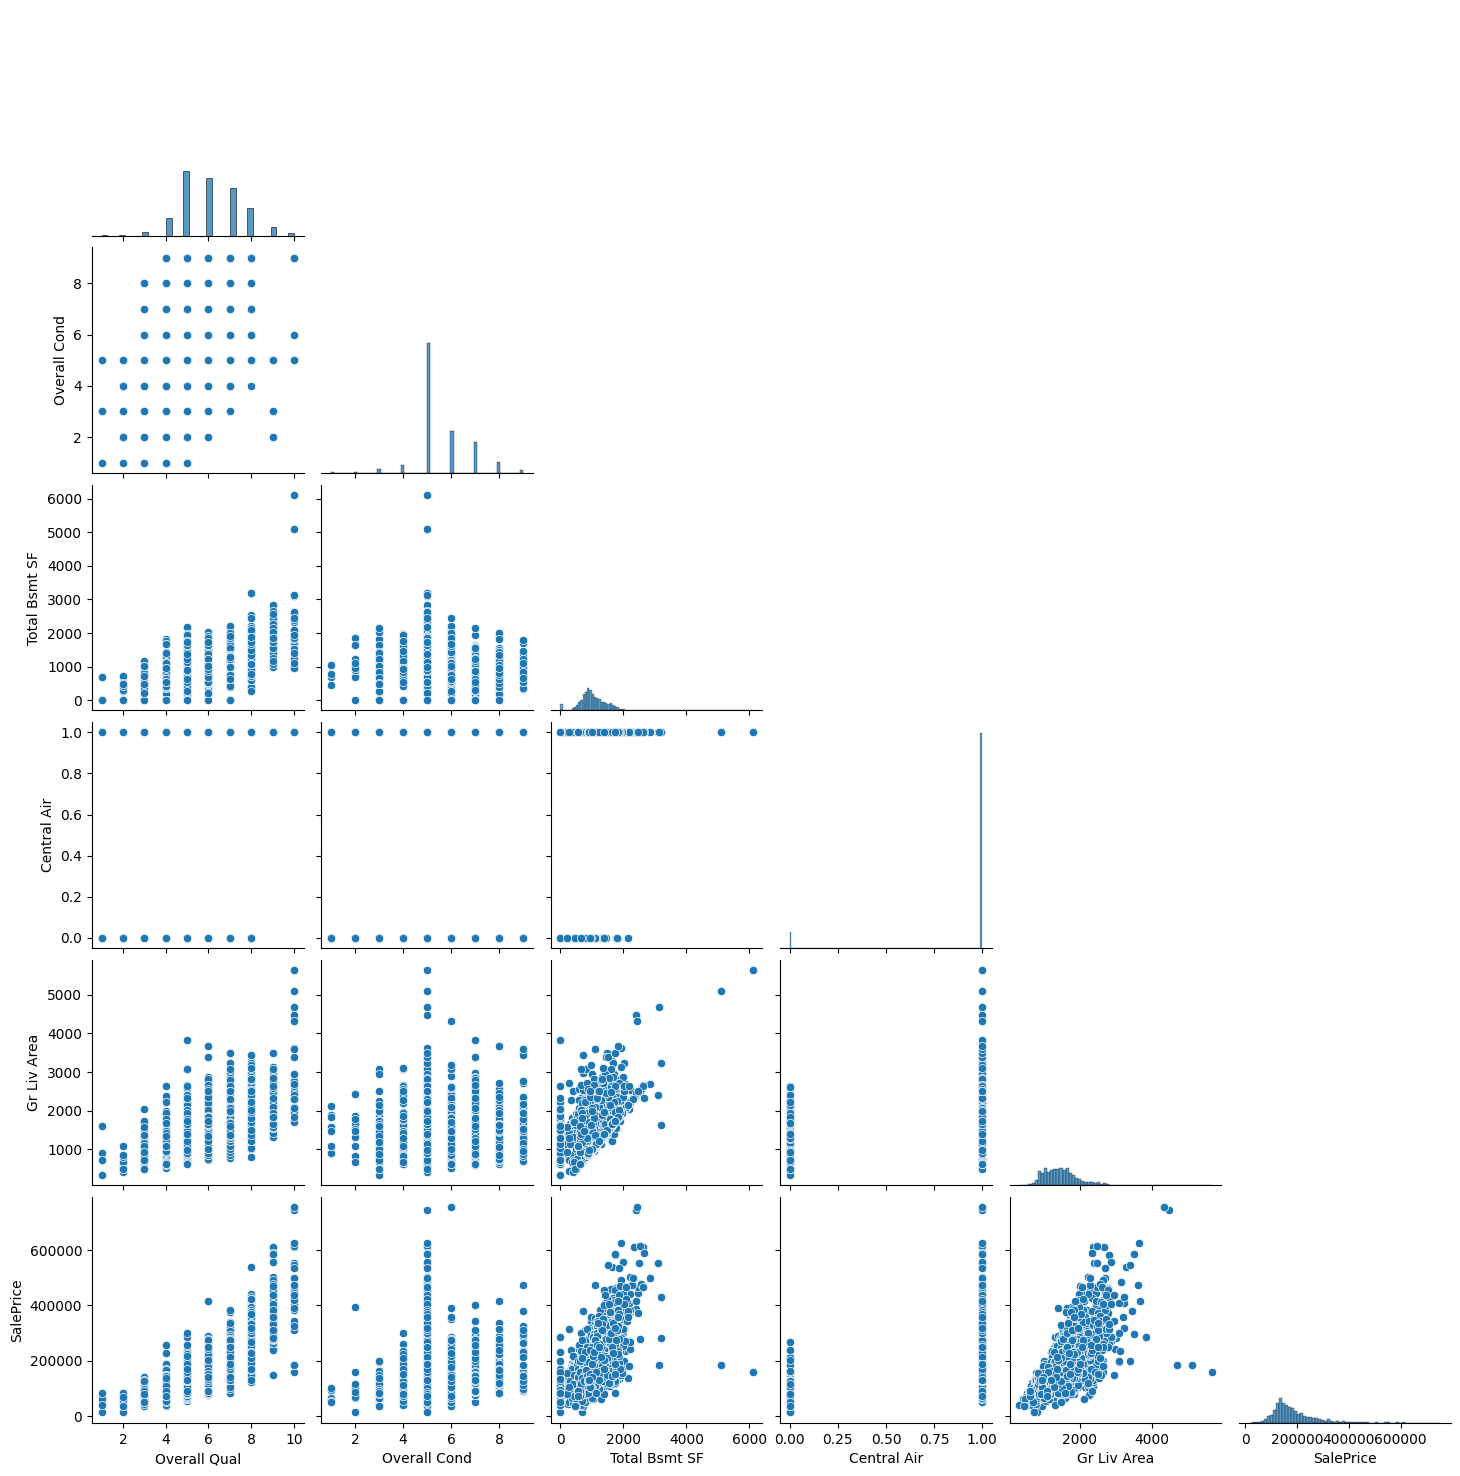

In [21]:
sns.pairplot(data=df, corner=True)

<Axes: >

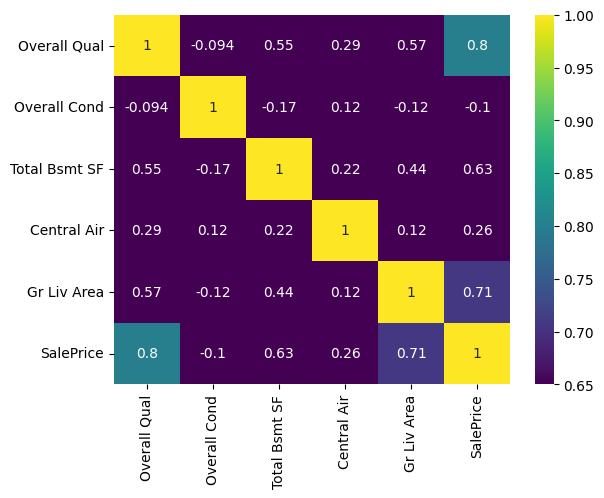

In [33]:
sns.heatmap(df.corr(), annot=True, vmin=.65, cmap='viridis')

In [34]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # default value
                         min_samples=.95,
                         residual_threshold=None, # default value
                         random_state=123)

In [35]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [38]:
ransac.fit(X, y)

,estimator,LinearRegression()
,min_samples,0.95
,residual_threshold,None
,is_data_valid,None
,is_model_valid,None
,max_trials,100
,max_skips,inf
,stop_n_inliers,inf
,stop_score,inf
,stop_probability,0.99
,loss,'absolute_error'


In [40]:
import numpy as np

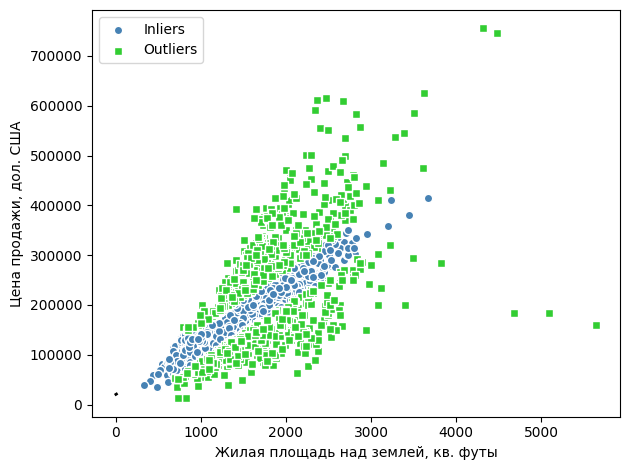

In [42]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolors='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolors='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Жилая площадь над землей, кв. футы')
plt.ylabel('Цена продажи, дол. США')
plt.legend(loc='upper left')
plt.tight_layout()

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [46]:
slr = LinearRegression()
slr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Residual plots

In [52]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

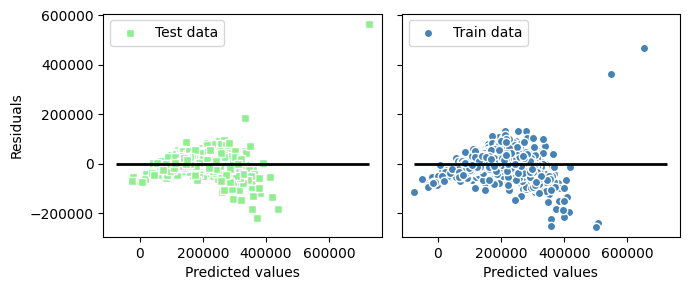

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[7, 3], sharey=True)
ax1.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', edgecolor='white', label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Train data')

ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error as mse

In [57]:
mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

# f'mse train: {np.sqrt(mse_train):.3f}', f'mse test: {np.sqrt(mse_test):.3f}'
f'mse train: {mse_train:.3f}', f'mse test: {mse_test:.3f}'

('mse train: 1497216245.853', 'mse test: 1516565820.999')

In [58]:
from sklearn.metrics import mean_absolute_error as mae

mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)


f'mae train: {mae_train:.3f}', f'mae test: {mae_test:.3f}'

('mae train: 25983.027', 'mae test: 24921.289')

In [59]:
from sklearn.metrics import r2_score

In [60]:
f'R2 train: {r2_score(y_train, y_train_pred):.3f}', f'R2 test: {r2_score(y_test, y_test_pred):.3f}'

('R2 train: 0.769', 'R2 test: 0.752')